<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-desafio_squad/blob/main/desafio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

## **Desafio 1: Entendendo o consumidor.**

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/desafio01consumidor.csv"
df_consumidor = pd.read_csv(url)
df_consumidor.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [ ]:
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


1. Entenda a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia
a. Identifique as distribuições b. Plote histogramas / boxplots


2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)


3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

## **Desafio 2: Determinando o Estoque de Segurança.**

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/desafio_02_estoque.csv"
df_estoque = pd.read_csv(url)
df_estoque.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [ ]:
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [ ]:
df_estoque['data'] = pd.to_datetime(df_estoque['data'])
df_estoque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            370 non-null    datetime64[ns]
 1   vendas-iogurte  370 non-null    int64         
 2   lead-time       370 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.8 KB


**1**. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

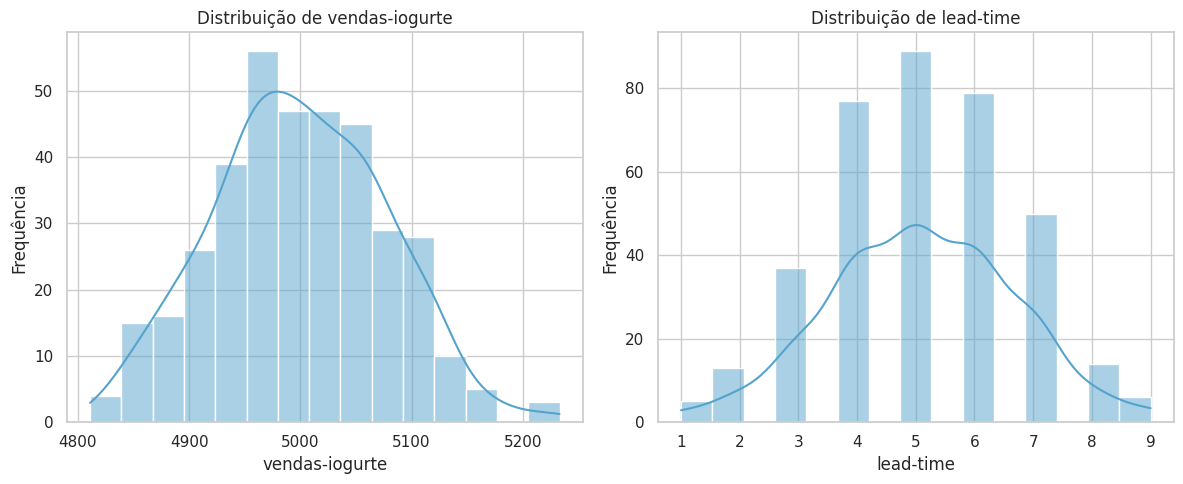

Os gráficos apresentam uma distribuição em formato de sino, que se assemelha muito visualmente a distribuição normal.


In [ ]:

sns.set_palette("icefire")
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
i = 0
for col in df_estoque.columns[1:]:
  sns.histplot(df_estoque[col], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição de {}'.format(col))
  ax[i].set_xlabel(col)
  ax[i].set_ylabel('Frequência')
  i = i + 1

plt.tight_layout()
plt.show()

print("Os gráficos apresentam uma distribuição em formato de sino, que se assemelha muito visualmente a distribuição normal.")

**2**. Assuma que:

*   a. Os dados seguem uma distribuição normal.
*   b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%
*   c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [ ]:
z_score = stats.norm.ppf(0.9987)

iogurte_std = df_estoque['vendas-iogurte'].std()
iogurte_mean = df_estoque['vendas-iogurte'].mean()

lead_time_std = df_estoque['lead-time'].std()
lead_time_mean = df_estoque['lead-time'].mean()

estoque_seguranca = z_score * iogurte_std * np.sqrt(lead_time_mean)
print(f'O estoque de segurança desejado é de {math.ceil(estoque_seguranca)}')

O estoque de segurança desejado é de 526
